# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Saving values into a dataframe and plotting it 

In [7]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)

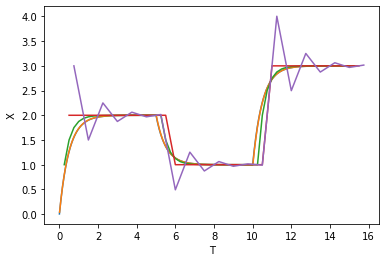

In [8]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple

## Error evaluation against step size

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [9]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)
_mean1 = stat.mean(x_array1)

std_dev = 0.0431
_mean = 0.5
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [10]:
def box_muller(array,standard_deviation,mean):
    random_vls = []
    i = 0
    it = 0
    while i < len(array):
        if(it == 0):
            z1 =  rand.uniform(0,2*np.pi)
            b  =  standard_deviation*np.sqrt(-2*math.log(rand.uniform(0,1)))
            z2 =  b*(math.sin(z1))+mean
            z3 =  b*(math.cos(z1))+mean
            noise = array[i] + z2
            random_vls.append(noise)
            it = 1
            i = i + 1
        else:
            it = 0
            noise = array[i] + z3
            random_vls.append(noise)
            i= i + 1
    return random_vls

In [11]:
random_vals = []
random_vals = box_muller(x_save2,std_dev,_mean)

## Noise plot

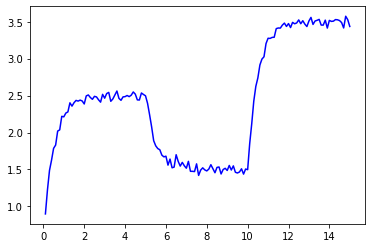

In [12]:
y = random_vals
x = t_save2
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

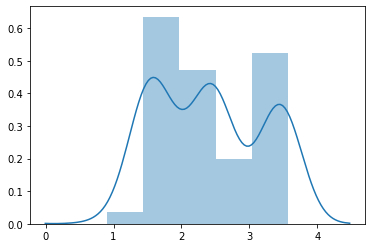

In [13]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

## Sigmoid Activation

In [14]:
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)
  return sigmoid

def train_weights3(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]
    itr = 0
    weights3_1 = []
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        w_adaptor = 0
        if itr < 1:
            for a in array:
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction, netwrk_sum = predict3(a,weights3)
                #print(weights3)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0] *lr*(error) 
                #print(weights3_change_bias)
                weights3[0] = weights3[0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
            
                for i in range(len(a)):
                    weights3[i + 1] = weights3[i +1] + weights3_change
                sum_error += error**2
                c = c + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
        else:
            for a in array:
                #weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction, netwrk_sum = predict3(a,weights3_1[w_adaptor])
                #print(weights3_1)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0] *lr*(error) 
                #print(weights3_change_bias)
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
                for i in range(len(a)):
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change
                sum_error += error**2
                c = c + 1
                w_adaptor = w_adaptor + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
    return net_array,error_array,weights3_1
            
def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i]
    activation2 = sigmoid_activation(net_sum)
    #print("activation",activation2,"sum",net_sum)
    return activation2, net_sum

def triple_converter(array):
    triple_array = []
    c = 0
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1
    return triple_array

## Step function activation

In [15]:
##--------------------------------SINGLE PERCEPTRON-----------------------------------------------##
def predict_step(noise1,weights1):
    net_sum = 0
    out = 0
    net_sum = weights1[0]
    for i in range(len(noise1)-1):
        net_sum += weights1[i + 1] * noise1[i]
    #print("netsum: ",net_sum)
    if net_sum > 1:
        out = 1
    else:
        out = 0
    return out

def train_weights_step(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]
    itr = 0
    weights3_1 = []
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        w_adaptor = 0
        if itr < 1:
            for a in array:
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction = predict_step(a,weights3)
                #print("prediction: ", prediction)
                #print(weights3)
                #print(weights3)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction
                error = delta
                #print("input",a[0])
                #print("error", error)
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0]*lr*error 
                #print(weights3_change_bias)
                weights3[0] = weights3[0] + weights3_change_bias
                weights3_change= -a[0]*lr*error
                for i in range(len(a)):
                    weights3[i + 1] = weights3[i +1] + weights3_change
                sum_error += error**2
                c = c + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
        else:
            for a in array:
                #weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction = predict_step(a,weights3_1[w_adaptor])
                #print("prediction1: ", prediction)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target
                error = delta
                #print("error",error)
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) 
                #print(weights3_change_bias)
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
                for i in range(len(a)):
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change
                sum_error += error**2
                c = c + 1
                w_adaptor = w_adaptor + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
    return net_array,error_array,weights3_1

In [16]:
#values1

## Train network using sigmoid

In [17]:
dat1 = triple_converter(random_vals)
values,e,w = train_weights3(dat1, 0.01,100)
#0.006531

#save to dataframe
data6= {'Noise_values':dat1,'Trained':values,'Error':e,'T':t_save2}
df6= pd.DataFrame(data6)

>epoch=0, lrate=0.010, error=0.014, , sum_error=26.332
>epoch=1, lrate=0.010, error=0.014, , sum_error=26.332
>epoch=2, lrate=0.010, error=0.005, , sum_error=22.802
>epoch=3, lrate=0.010, error=0.002, , sum_error=19.914
>epoch=4, lrate=0.010, error=0.001, , sum_error=17.485
>epoch=5, lrate=0.010, error=0.000, , sum_error=15.396
>epoch=6, lrate=0.010, error=0.000, , sum_error=13.573
>epoch=7, lrate=0.010, error=0.000, , sum_error=11.964
>epoch=8, lrate=0.010, error=0.000, , sum_error=10.540
>epoch=9, lrate=0.010, error=0.000, , sum_error=9.277
>epoch=10, lrate=0.010, error=0.000, , sum_error=8.161
>epoch=11, lrate=0.010, error=0.000, , sum_error=7.177
>epoch=12, lrate=0.010, error=0.000, , sum_error=6.313
>epoch=13, lrate=0.010, error=0.000, , sum_error=5.557
>epoch=14, lrate=0.010, error=0.000, , sum_error=4.898
>epoch=15, lrate=0.010, error=0.000, , sum_error=4.325
>epoch=16, lrate=0.010, error=0.000, , sum_error=3.828
>epoch=17, lrate=0.010, error=0.000, , sum_error=3.397
>epoch=18, 

In [18]:
w[0]

[1.0, 0.07655973226345947, 0.6227217874942342, 0.26199299388763686]

In [19]:
w[0]

[1.0, 0.07655973226345947, 0.6227217874942342, 0.26199299388763686]

In [20]:
df6

,Noise_values,Trained,Error,T
0,"[0, 0, 0.8987998071646269]",1.367879,-0.469080,0.1
1,"[0, 1.2241610564575898, 0.8987998071646269]",1.171648,0.052513,0.2
2,"[1.4879586425888833, 1.2241610564575898, 0.898...",1.423446,0.064513,0.3
3,"[1.6268299354709828, 1.4879586425888833, 1.224...",1.592213,0.034617,0.4
4,"[1.7858206894485908, 1.6268299354709828, 1.487...",1.777391,0.008429,0.5
...,...,...,...,...
145,"[3.4883944732714167, 3.5151947005259454, 3.525...",3.488394,0.000000,14.6
146,"[3.415371726003145, 3.4883944732714167, 3.5151...",3.415372,0.000000,14.7
147,"[3.573880691766092, 3.415371726003145, 3.48839...",3.573881,0.000000,14.8
148,"[3.527018174902204, 3.573880691766092, 3.41537...",3.527018,0.000000,14.9


## Network prediction(blue) against noise values(yellow)

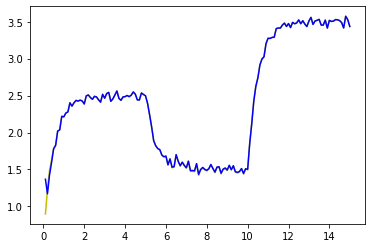

In [21]:
y_axis = values #network output
y = random_vals
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Train network using step function

In [51]:
values1,x,y = train_weights_step(dat1, 0.01,50)

>epoch=0, lrate=0.010, error=3.436, , sum_error=894.605
>epoch=1, lrate=0.010, error=-3.436, , sum_error=894.605
>epoch=2, lrate=0.010, error=-3.436, , sum_error=890.588
>epoch=3, lrate=0.010, error=-3.436, , sum_error=886.640
>epoch=4, lrate=0.010, error=-3.436, , sum_error=882.740
>epoch=5, lrate=0.010, error=-3.436, , sum_error=878.760
>epoch=6, lrate=0.010, error=-3.436, , sum_error=874.796
>epoch=7, lrate=0.010, error=-3.436, , sum_error=870.909
>epoch=8, lrate=0.010, error=-3.436, , sum_error=863.052
>epoch=9, lrate=0.010, error=-3.436, , sum_error=863.052
>epoch=10, lrate=0.010, error=-3.436, , sum_error=855.066
>epoch=11, lrate=0.010, error=-3.436, , sum_error=850.980
>epoch=12, lrate=0.010, error=-3.436, , sum_error=850.980
>epoch=13, lrate=0.010, error=-3.436, , sum_error=847.134
>epoch=14, lrate=0.010, error=-3.436, , sum_error=839.207
>epoch=15, lrate=0.010, error=-3.436, , sum_error=835.083
>epoch=16, lrate=0.010, error=-3.436, , sum_error=835.083
>epoch=17, lrate=0.010, e

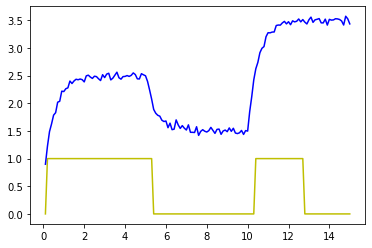

In [52]:

y_axis = random_vals #network output
y = values1
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()


## Perceptron values against different noise samples(Sigmoid)

### Adding noise to other step sizes using box muller

#### Example 1(step size =0.1)

In [24]:
random_vals1 = []
random_vals1 = box_muller(x_save1,std_dev,_mean)
random_vals_t1 = []
random_vals_t1 = triple_converter(random_vals1)

#values,e = train_weights3(dat1, 0.01,1)
#0.006531
values1,e1,w = train_weights3(random_vals_t1, 0.01,40)

>epoch=0, lrate=0.010, error=0.138, , sum_error=34.639
>epoch=1, lrate=0.010, error=0.138, , sum_error=34.639
>epoch=2, lrate=0.010, error=0.047, , sum_error=29.951
>epoch=3, lrate=0.010, error=0.015, , sum_error=27.716
>epoch=4, lrate=0.010, error=0.005, , sum_error=25.972
>epoch=5, lrate=0.010, error=0.002, , sum_error=24.459
>epoch=6, lrate=0.010, error=0.001, , sum_error=23.107
>epoch=7, lrate=0.010, error=0.000, , sum_error=21.884
>epoch=8, lrate=0.010, error=0.000, , sum_error=20.765
>epoch=9, lrate=0.010, error=0.000, , sum_error=19.735
>epoch=10, lrate=0.010, error=0.000, , sum_error=18.782
>epoch=11, lrate=0.010, error=0.000, , sum_error=17.896
>epoch=12, lrate=0.010, error=0.000, , sum_error=17.071
>epoch=13, lrate=0.010, error=0.000, , sum_error=16.299
>epoch=14, lrate=0.010, error=0.000, , sum_error=15.577
>epoch=15, lrate=0.010, error=0.000, , sum_error=14.899
>epoch=16, lrate=0.010, error=0.000, , sum_error=14.262
>epoch=17, lrate=0.010, error=0.000, , sum_error=13.662
>e

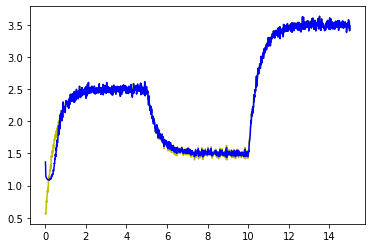

In [25]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation 

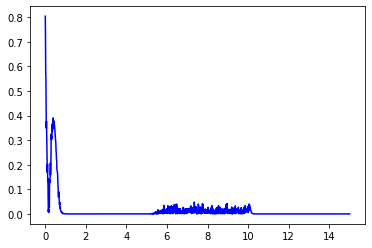

In [26]:
e_array = e1
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_save1
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [27]:
len(e1)

1500

In [28]:
data7= {'Noise_values':random_vals_t1,'Network_output':values1,'Error':e1,'T':t_save1}
vis= pd.DataFrame(data7)
vis

,Noise_values,Network_output,Error,T
0,"[0, 0, 0.5642590160527738]",1.367879,8.036204e-01,0.01
1,"[0, 0.5693820840000667, 0.5642590160527738]",1.287524,7.181423e-01,0.02
2,"[0.560509863568758, 0.5693820840000667, 0.5642...",1.142529,5.820194e-01,0.03
3,"[0.5915422964485009, 0.560509863568758, 0.5693...",1.138541,5.469987e-01,0.04
4,"[0.6614500116953703, 0.5915422964485009, 0.560...",1.128433,4.669833e-01,0.05
...,...,...,...,...
1495,"[3.5325387817425957, 3.4771269756903003, 3.579...",3.532539,0.000000e+00,14.96
1496,"[3.5414260333936713, 3.5325387817425957, 3.477...",3.541426,0.000000e+00,14.97
1497,"[3.551160956719939, 3.5414260333936713, 3.5325...",3.551161,0.000000e+00,14.98
1498,"[3.4087306447409786, 3.551160956719939, 3.5414...",3.408731,4.440892e-16,14.99


#### Example 2(step size = 0.01)

In [29]:
random_vals2 = []
random_vals2 = box_muller(x_save2,std_dev,_mean)
random_vals_t2 =[]
random_vals_t2 = triple_converter(random_vals2)
values2,e2,w =train_weights3(random_vals_t2,0.01,20)

>epoch=0, lrate=0.010, error=0.029, , sum_error=52.030
>epoch=1, lrate=0.010, error=0.029, , sum_error=52.030
>epoch=2, lrate=0.010, error=0.008, , sum_error=47.372
>epoch=3, lrate=0.010, error=0.002, , sum_error=43.461
>epoch=4, lrate=0.010, error=0.001, , sum_error=40.077
>epoch=5, lrate=0.010, error=0.000, , sum_error=37.068
>epoch=6, lrate=0.010, error=0.000, , sum_error=34.331
>epoch=7, lrate=0.010, error=0.000, , sum_error=31.801
>epoch=8, lrate=0.010, error=0.000, , sum_error=29.438
>epoch=9, lrate=0.010, error=0.000, , sum_error=27.217
>epoch=10, lrate=0.010, error=0.000, , sum_error=25.125
>epoch=11, lrate=0.010, error=0.000, , sum_error=23.153
>epoch=12, lrate=0.010, error=0.000, , sum_error=21.296
>epoch=13, lrate=0.010, error=0.000, , sum_error=19.549
>epoch=14, lrate=0.010, error=0.000, , sum_error=17.912
>epoch=15, lrate=0.010, error=0.000, , sum_error=16.381
>epoch=16, lrate=0.010, error=0.000, , sum_error=14.955
>epoch=17, lrate=0.010, error=0.000, , sum_error=13.633
>e

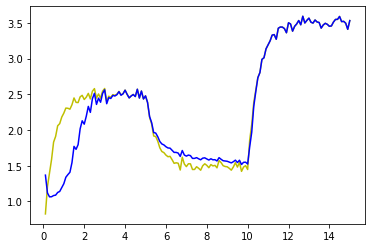

In [30]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

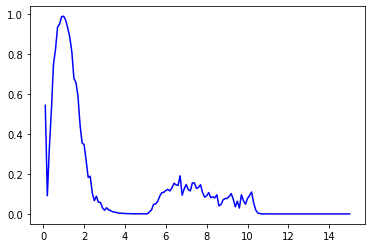

In [31]:
e_array = e2
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_save2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [32]:
len(values2)

150

In [33]:
data8= {'Noise_values':random_vals_t2,'Network_output':values2,'Error':e2,'T':t_save2}
vis1= pd.DataFrame(data8)
vis1

,Noise_values,Network_output,Error,T
0,"[0, 0, 0.8249607062005877]",1.367879,5.429187e-01,0.1
1,"[0, 1.2093681322218446, 0.8249607062005877]",1.118425,9.094313e-02,0.2
2,"[1.3972809405382753, 1.2093681322218446, 0.824...",1.064226,3.330554e-01,0.3
3,"[1.58658276611587, 1.3972809405382753, 1.20936...",1.065532,5.210512e-01,0.4
4,"[1.8304115303275639, 1.58658276611587, 1.39728...",1.082365,7.480466e-01,0.5
...,...,...,...,...
145,"[3.5186300586110697, 3.590920086138388, 3.5497...",3.518630,2.114309e-12,14.6
146,"[3.522374259328576, 3.5186300586110697, 3.5909...",3.522374,5.546674e-13,14.7
147,"[3.4963576960887854, 3.522374259328576, 3.5186...",3.496358,3.407941e-12,14.8
148,"[3.410574836424737, 3.4963576960887854, 3.5223...",3.410575,1.777196e-10,14.9


#### Example 3(step size = 0.5)

In [34]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(random_vals3)
values3,e3,w = train_weights3(random_vals_t3, 0.011,100)

>epoch=0, lrate=0.011, error=-0.094, , sum_error=23.840
>epoch=1, lrate=0.011, error=-0.094, , sum_error=23.840
>epoch=2, lrate=0.011, error=-0.018, , sum_error=19.778
>epoch=3, lrate=0.011, error=-0.004, , sum_error=16.734
>epoch=4, lrate=0.011, error=-0.001, , sum_error=14.250
>epoch=5, lrate=0.011, error=-0.000, , sum_error=12.195
>epoch=6, lrate=0.011, error=-0.000, , sum_error=10.543
>epoch=7, lrate=0.011, error=-0.000, , sum_error=9.164
>epoch=8, lrate=0.011, error=-0.000, , sum_error=7.952
>epoch=9, lrate=0.011, error=-0.000, , sum_error=6.873
>epoch=10, lrate=0.011, error=-0.000, , sum_error=5.932
>epoch=11, lrate=0.011, error=-0.000, , sum_error=5.137
>epoch=12, lrate=0.011, error=-0.000, , sum_error=4.489
>epoch=13, lrate=0.011, error=-0.000, , sum_error=3.980
>epoch=14, lrate=0.011, error=-0.000, , sum_error=3.595
>epoch=15, lrate=0.011, error=-0.000, , sum_error=3.314
>epoch=16, lrate=0.011, error=-0.000, , sum_error=3.117
>epoch=17, lrate=0.011, error=-0.000, , sum_error=2

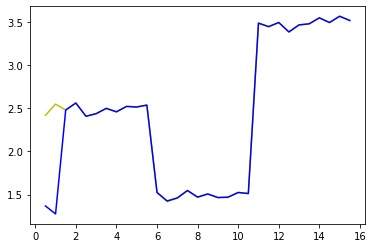

In [35]:
y_axis = values3 #network output
y = random_vals3 # x noise
x_axis = x = t_array4
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

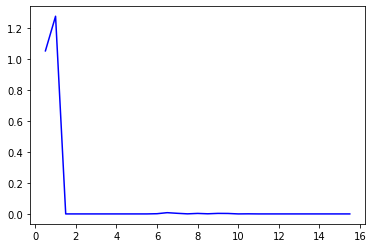

In [36]:
e_array = e3
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array4
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [37]:
data9= {'Noise_values':random_vals_t3,'Network_output':values3,'Error':e3,'T':t_array4}
vis2= pd.DataFrame(data9)
vis2

,Noise_values,Network_output,Error,T
0,"[0, 0, 2.419063637103549]",1.367879,1.051184e+00,0.5
1,"[0, 2.549889458803278, 2.419063637103549]",1.275510,1.274380e+00,1.0
2,"[2.481070060754707, 2.549889458803278, 2.41906...",2.481070,4.269385e-11,1.5
3,"[2.5623440074720336, 2.481070060754707, 2.5498...",2.562344,2.081446e-12,2.0
4,"[2.408688682569232, 2.5623440074720336, 2.4810...",2.408689,2.873453e-10,2.5
5,"[2.4387145220814737, 2.408688682569232, 2.5623...",2.438715,1.669069e-10,3.0
6,"[2.5002472032333487, 2.4387145220814737, 2.408...",2.500247,1.251355e-11,3.5
7,"[2.4601573633952083, 2.5002472032333487, 2.438...",2.460157,2.930767e-11,4.0
8,"[2.5231401177414523, 2.4601573633952083, 2.500...",2.523140,2.719158e-12,4.5
9,"[2.516198058025023, 2.5231401177414523, 2.4601...",2.516198,1.852740e-12,5.0


#### Example 4(step size = 0.75)

In [38]:
random_vals4 = []
random_vals4 = box_muller(x_array5,std_dev,_mean)
random_vals_t4 = triple_converter(random_vals4)
values4,e4,w = train_weights3(random_vals_t4, 0.01,15)

>epoch=0, lrate=0.010, error=1.468, , sum_error=55.849
>epoch=1, lrate=0.010, error=1.468, , sum_error=55.849
>epoch=2, lrate=0.010, error=0.930, , sum_error=50.336
>epoch=3, lrate=0.010, error=0.454, , sum_error=44.037
>epoch=4, lrate=0.010, error=0.172, , sum_error=37.046
>epoch=5, lrate=0.010, error=0.055, , sum_error=28.908
>epoch=6, lrate=0.010, error=0.017, , sum_error=21.414
>epoch=7, lrate=0.010, error=0.005, , sum_error=18.440
>epoch=8, lrate=0.010, error=0.001, , sum_error=17.374
>epoch=9, lrate=0.010, error=0.000, , sum_error=16.604
>epoch=10, lrate=0.010, error=0.000, , sum_error=15.987
>epoch=11, lrate=0.010, error=0.000, , sum_error=15.445
>epoch=12, lrate=0.010, error=0.000, , sum_error=14.899
>epoch=13, lrate=0.010, error=0.000, , sum_error=14.304
>epoch=14, lrate=0.010, error=0.000, , sum_error=13.640


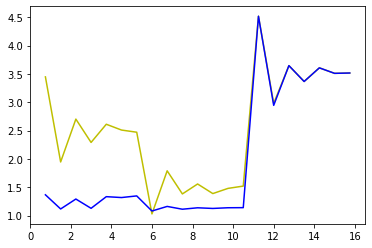

In [39]:
y_axis = values4 #network output
y = random_vals4 # x noise
x_axis = x = t_array5
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

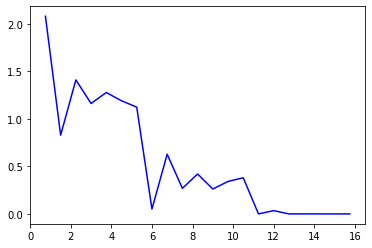

In [40]:
e_array = e4
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array5
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [41]:
#itr,input,output,error
data_10= {'Noise_values':random_vals_t4,'Network_output':values4,'Error':e4,'T':t_array5}
vis3= pd.DataFrame(data_10)
vis3

,Noise_values,Network_output,Error,T
0,"[0, 0, 3.4478286164981804]",1.367879,2.079949e+00,0.75
1,"[0, 1.9469484988243633, 3.4478286164981804]",1.118136,8.288125e-01,1.50
2,"[2.703035500156344, 1.9469484988243633, 3.4478...",1.293088,1.409947e+00,2.25
3,"[2.291543544884867, 2.703035500156344, 1.94694...",1.129475,1.162068e+00,3.00
4,"[2.6122447551948547, 2.291543544884867, 2.7030...",1.334997,1.277248e+00,3.75
5,"[2.509929628780578, 2.6122447551948547, 2.2915...",1.319436,1.190494e+00,4.50
6,"[2.471689713020732, 2.509929628780578, 2.61224...",1.348210,1.123479e+00,5.25
7,"[1.0307102957628191, 2.471689713020732, 2.5099...",1.081985,5.127467e-02,6.00
8,"[1.7907844800615798, 1.0307102957628191, 2.471...",1.162940,6.278441e-01,6.75
9,"[1.383188725042893, 1.7907844800615798, 1.0307...",1.113624,2.695650e-01,7.50


# Perceptron model with different learning rates

## Example 1

In [42]:
random_vals1 = []
random_vals1 = box_muller(x_save2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.006531,5)

NameError: name 'train_weights' is not defined

In [ ]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

In [ ]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Example 2

In [ ]:
random_vals1 = []
random_vals1 = box_muller(x_array2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.06531,5)

In [ ]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

## Example 3

In [ ]:
random_vals8 = []
random_vals8 = box_muller(x_array2,std_dev,_mean)
values8,e8 = train_weights(random_vals8, 0.6531,5)

In [ ]:
y_axis = values8 #network output
y = random_vals8
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
data_11= {'Noise_values':random_vals8,'Network_output':values8,'Error':e8,'T':t_array2}
vis8= pd.DataFrame(data_11)
vis8

In [ ]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [ ]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3,w = train_weights3(random_vals_t3, 0.011,100)

In [ ]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #u_values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
w

In [ ]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3 = train_weights(x_array2, 0.011,5)

In [ ]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
len(values3)

In [ ]:
e_array = e3
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()